In [1]:
import pandas as pd
import pickle
import seaborn as snb
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [2]:
polar_halfs_dat = pickle.load( open( "PSFHalfPolar.p", "rb" ) )

In [3]:
grouped_polar = polar_halfs_dat.groupby(['Soffset','Doffset'])

polar_halfs = {}
for a,b in grouped_polar:
    group = b[['xslice','yslice','zslice','mag','Soffset','Doffset']]
    polar_halfs[a] = {'means':group.groupby("mag").mean(),
                 'vars':group.groupby("mag").var(ddof=1),
                'stds':group.groupby("mag").std(ddof=1)}

In [4]:
from scipy.optimize import curve_fit
mags = polar_halfs[(0,1)]['stds'].index

def recip(x,A,B):
    return A/x + B

def lin(x,A,B):
    return A*x + B

def reciplin(x,A,B,C):
    return A/x + B*x + C

popt1_e, pcov = curve_fit(lin, mags.data.tolist(), polar_halfs[(1,0)]['means'].\
                          xslice.as_matrix())
popt2_e, pcov = curve_fit(lin, mags.data.tolist(), polar_halfs[(1,0)]['means'].\
                          yslice.as_matrix())
popt3_e, pcov = curve_fit(lin, mags.data.tolist(), polar_halfs[(1,0)]['means'].\
                          zslice.as_matrix())


rmse_px10 = np.sqrt(np.mean((lin(np.array(mags.data.tolist()),*popt1_e)-\
                             polar_halfs[(1,0)]['means'].xslice.as_matrix())**2))
rmse_py10 = np.sqrt(np.mean((lin(np.array(mags.data.tolist()),*popt2_e)-\
                             polar_halfs[(1,0)]['means'].yslice.as_matrix())**2))
rmse_pz10 = np.sqrt(np.mean((lin(np.array(mags.data.tolist()),*popt3_e)-\
                             polar_halfs[(1,0)]['means'].zslice.as_matrix())**2))


popt1_l, pcov = curve_fit(recip, mags.data.tolist(), polar_halfs[(0,1)]['means'].\
                          xslice.as_matrix())
popt2_l, pcov = curve_fit(recip, mags.data.tolist(), polar_halfs[(0,1)]['means'].\
                          yslice.as_matrix())
popt3_l, pcov = curve_fit(recip, mags.data.tolist(), polar_halfs[(0,1)]['means'].\
                          zslice.as_matrix())


rmse_px01 = np.sqrt(np.mean((recip(np.array(mags.data.tolist()),*popt1_l)-\
                             polar_halfs[(0,1)]['means'].xslice.as_matrix())**2))
rmse_py01 = np.sqrt(np.mean((recip(np.array(mags.data.tolist()),*popt2_l)-\
                             polar_halfs[(0,1)]['means'].yslice.as_matrix())**2))
rmse_pz01 = np.sqrt(np.mean((recip(np.array(mags.data.tolist()),*popt3_l)-\
                             polar_halfs[(0,1)]['means'].zslice.as_matrix())**2))

popt1, pcov = curve_fit(reciplin, mags.data.tolist(), polar_halfs[(1,1)]['means'].\
                        xslice.as_matrix())
popt2, pcov = curve_fit(reciplin, mags.data.tolist(), polar_halfs[(1,1)]['means'].\
                        yslice.as_matrix())
popt3, pcov = curve_fit(reciplin, mags.data.tolist(), polar_halfs[(1,1)]['means'].\
                        zslice.as_matrix())


rmse_px11 = np.sqrt(np.mean((reciplin(np.array(mags.data.tolist()),*popt1)-\
                             polar_halfs[(1,1)]['means'].xslice.as_matrix())**2))
rmse_py11 = np.sqrt(np.mean((reciplin(np.array(mags.data.tolist()),*popt2)-\
                             polar_halfs[(1,1)]['means'].yslice.as_matrix())**2))
rmse_pz11 = np.sqrt(np.mean((reciplin(np.array(mags.data.tolist()),*popt3)-\
                             polar_halfs[(1,1)]['means'].zslice.as_matrix())**2))

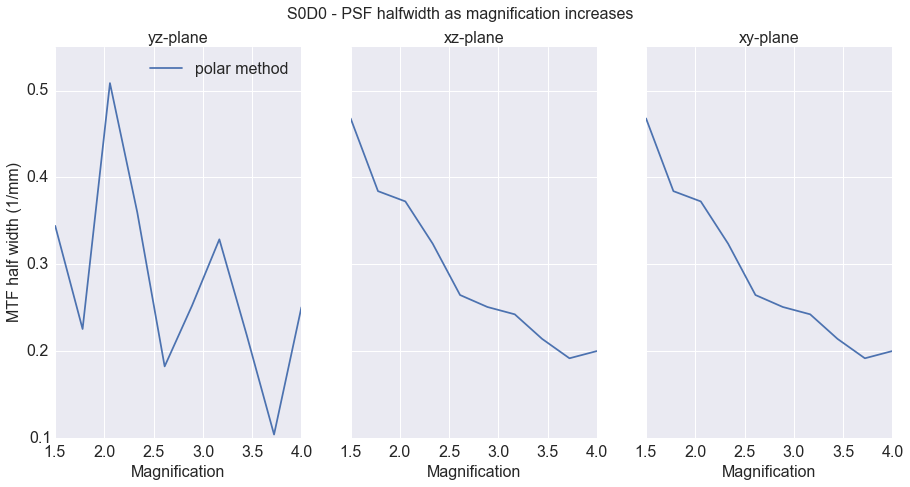

In [5]:
fig,(ax1,ax2,ax3) = plt.subplots(ncols=3,nrows=1,figsize = (15,7),sharey=True)

fig.suptitle('S0D0 - PSF halfwidth as magnification increases',fontsize=16)

polar_halfs[(0,0)]['means'].xslice.plot(ax=ax1,label='polar method',fontsize=16)
ax1.legend(loc=0,fontsize=16)
ax1.set_ylabel('MTF half width (1/mm)',fontsize = 16)
ax1.set_xlabel('Magnification',fontsize = 16)
ax1.set_title("yz-plane",fontsize = 16)
ax1.tick_params(axis='both', which='major', labelsize=16)

polar_halfs[(0,0)]['means'].yslice.plot(ax=ax2,label='polar method',fontsize=16)
ax2.set_title("xz-plane",fontsize = 16)
ax2.set_xlabel('Magnification',fontsize = 16)
ax2.tick_params(axis='both', which='major', labelsize=16)

polar_halfs[(0,0)]['means'].zslice.plot(ax=ax3,label='polar method',fontsize=16)
ax3.set_title("xy-plane",fontsize = 16)
ax3.tick_params(axis='both', which='major', labelsize=16)
ax3.set_xlabel('Magnification',fontsize = 16)

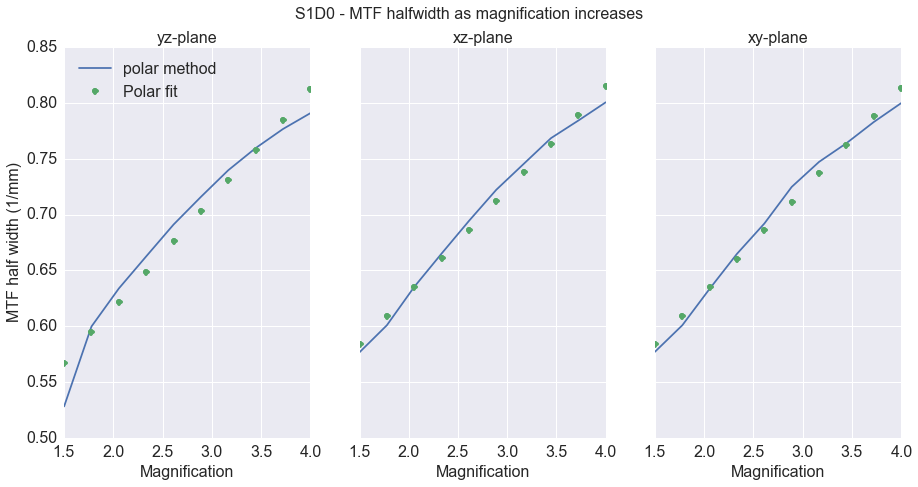

In [6]:
fig,(ax1,ax2,ax3) = plt.subplots(ncols=3,nrows=1,figsize = (15,7),sharey=True)

fig.suptitle('S1D0 - MTF halfwidth as magnification increases',fontsize=16)

polar_halfs[(1,0)]['means'].xslice.plot(ax=ax1,label='polar method',fontsize=16)
ax1.plot(mags.data.tolist(),lin(np.array(mags.data.tolist()),*popt1_e),'o'\
         ,label = 'Polar fit')
ax1.legend(loc=0,fontsize=16)
ax1.set_xlabel('Magnification',fontsize = 16)
ax1.set_title("yz-plane",fontsize = 16)
ax1.set_ylabel('MTF half width (1/mm)',fontsize = 16)
ax1.tick_params(axis='both', which='major', labelsize=16)

polar_halfs[(1,0)]['means'].yslice.plot(ax=ax2,label='polar method',fontsize=16)
ax2.plot(mags.data.tolist(),lin(np.array(mags.data.tolist()),*popt2_e),'o'\
         ,label = 'Polar fit')
ax2.set_title("xz-plane",fontsize = 16)
ax2.set_xlabel('Magnification',fontsize = 16)
ax2.tick_params(axis='both', which='major', labelsize=16)

polar_halfs[(1,0)]['means'].zslice.plot(ax=ax3,label='polar method',fontsize=16)
ax3.plot(mags.data.tolist(),lin(np.array(mags.data.tolist()),*popt3_e),'o'\
         ,label = 'Polar fit')
ax3.set_title("xy-plane",fontsize = 16)
ax3.set_xlabel('Magnification',fontsize = 16)
ax3.tick_params(axis='both', which='major', labelsize=16)

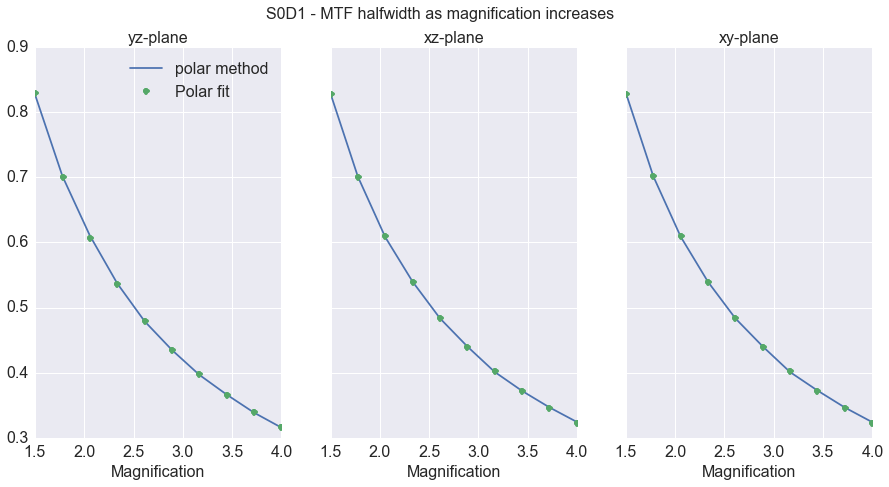

In [7]:
fig,(ax1,ax2,ax3) = plt.subplots(ncols=3,nrows=1,figsize = (15,7),sharey=True)

fig.suptitle('S0D1 - MTF halfwidth as magnification increases',fontsize=16)

polar_halfs[(0,1)]['means'].xslice.plot(ax=ax1,label='polar method',fontsize=16)
ax1.plot(mags.data.tolist(),recip(np.array(mags.data.tolist()),*popt1_l),'o'\
         ,label = 'Polar fit')
ax1.legend(loc=0,fontsize=16)
ax1.set_title("yz-plane",fontsize = 16)
ax1.set_xlabel('Magnification',fontsize = 16)
ax1.tick_params(axis='both', which='major', labelsize=16)

polar_halfs[(0,1)]['means'].yslice.plot(ax=ax2,label='polar method',fontsize=16)
ax2.plot(mags.data.tolist(),recip(np.array(mags.data.tolist()),*popt2_l),'o'\
         ,label = 'Polar fit')
ax2.set_title("xz-plane",fontsize = 16)
ax2.set_xlabel('Magnification',fontsize = 16)
ax2.tick_params(axis='both', which='major', labelsize=16)

polar_halfs[(0,1)]['means'].zslice.plot(ax=ax3,label='polar method',fontsize=16)
ax3.plot(mags.data.tolist(),recip(np.array(mags.data.tolist()),*popt3_l),'o'\
         ,label = 'Polar fit')
ax3.set_title("xy-plane",fontsize = 16)
ax3.set_xlabel('Magnification',fontsize = 16)
ax3.tick_params(axis='both', which='major', labelsize=16)

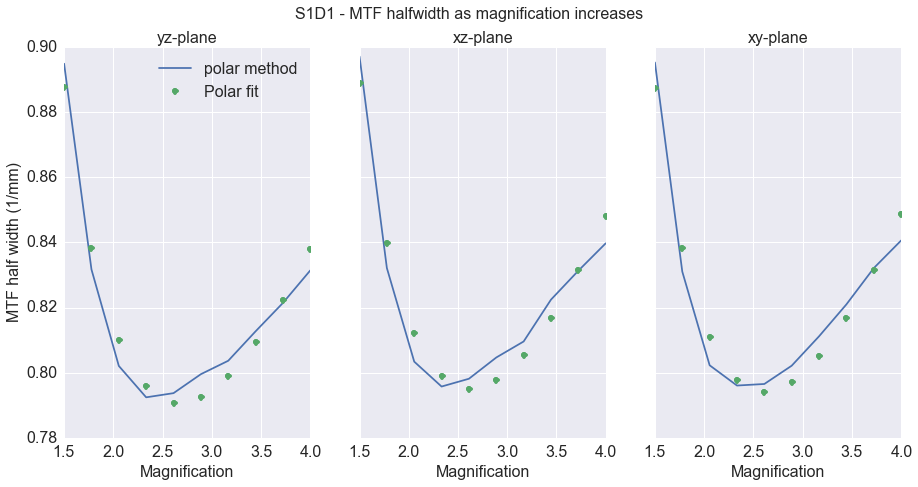

In [8]:
fig,(ax1,ax2,ax3) = plt.subplots(ncols=3,nrows=1,figsize = (15,7),sharey=True)

fig.suptitle('S1D1 - MTF halfwidth as magnification increases',fontsize=16)

polar_halfs[(1,1)]['means'].xslice.plot(ax=ax1,label='polar method',fontsize=16)
ax1.plot(mags.data.tolist(),reciplin(np.array(mags.data.tolist()),*popt1),'o'\
         ,label = 'Polar fit')
ax1.legend(loc=0,fontsize=16)
ax1.set_ylabel('MTF half width (1/mm)',fontsize = 16)
ax1.set_xlabel('Magnification',fontsize = 16)
ax1.set_title("yz-plane",fontsize = 16)
ax1.tick_params(axis='both', which='major', labelsize=16)

polar_halfs[(1,1)]['means'].yslice.plot(ax=ax2,label='polar method',fontsize=16)
ax2.plot(mags.data.tolist(),reciplin(np.array(mags.data.tolist()),*popt2),'o'\
         ,label = 'Polar fit')
ax2.set_title("xz-plane",fontsize = 16)
ax2.tick_params(axis='both', which='major', labelsize=16)
ax2.set_xlabel('Magnification',fontsize = 16)

polar_halfs[(1,1)]['means'].zslice.plot(ax=ax3,label='polar method',fontsize=16)
ax3.plot(mags.data.tolist(),reciplin(np.array(mags.data.tolist()),*popt3),'o'\
         ,label = 'Polar fit')
ax3.set_title("xy-plane",fontsize = 16)
ax3.tick_params(axis='both', which='major', labelsize=16)
ax3.set_xlabel('Magnification',fontsize = 16)